# Feature Layer

Load environment variable from .env file with python-dotenv package

In [1]:
import os
from dotenv import load_dotenv # add this line

load_dotenv() # add this line

arcgis_user = os.getenv("ARCGIS_USER")
arcgis_pass = os.getenv("ARCGIS_PASS")
arcgis_portal = os.getenv("ARCGIS_PORTAL")

Make GIS object

In [2]:
from arcgis.gis import GIS
gis = GIS(arcgis_portal, arcgis_user, arcgis_pass)
gis

GIS @ https://pcovidjatim.maps.arcgis.com version:8.2

## Load Published Layer by Id

Load jatim layer item by id

<Item title:"Peta Sebaran Covid19 Jawa Timur (Coba Coba)" type:Feature Layer Collection owner:prediksicovidjatim>
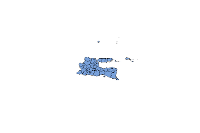

In [3]:
jatim_id = '7a84aef70d1d401f82abfb8324066d54'
jatim = gis.content.get(jatim_id)
jatim

## Check Available Layers

In [4]:
jatim.layers

[<FeatureLayer url:"https://services2.arcgis.com/gxevpFKXaRT0UMCs/arcgis/rest/services/jatim2_test/FeatureServer/0">]

In [5]:
for lyr in jatim.layers:
    print(lyr.properties.name)

jatim2_test


## Layer Capabilities

What operations can be done for the layer?

By default, a layer only has Query capability. If it doesn't have update?editing? capability, then it can't be edited. You can turn on the edit capability at the layer's settings. Of course, you need the permission to do it from the owner.

In [6]:
jatim_layer = jatim.layers[0]
jatim_layer.properties.capabilities

'Create,Delete,Query,Update,Editing'

## Layer Fields

What fields does it have?

In [7]:
jatim_layer.properties.fields

[{
   "name": "FID",
   "type": "esriFieldTypeOID",
   "actualType": "int",
   "alias": "FID",
   "sqlType": "sqlTypeInteger",
   "nullable": false,
   "editable": false,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "ID",
   "type": "esriFieldTypeDouble",
   "actualType": "float",
   "alias": "ID",
   "sqlType": "sqlTypeFloat",
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "Kabupaten_",
   "type": "esriFieldTypeString",
   "actualType": "nvarchar",
   "alias": "Kabupaten_",
   "sqlType": "sqlTypeNVarchar",
   "length": 55,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "Provinsi",
   "type": "esriFieldTypeString",
   "actualType": "nvarchar",
   "alias": "Provinsi",
   "sqlType": "sqlTypeNVarchar",
   "length": 50,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "ODP",
   "type": "esriFieldTypeInteger",
 

## Add Layer to Map

Show jatim in map

In [9]:
map = gis.map("Jawa Timur", zoomlevel=8)
map.add_layer(jatim)
map

MapView(layout=Layout(height='400px', width='100%'))

## Querying Layer Features

You can query the layer

In [23]:
query_result1 = jatim_layer.query(out_fields='Tanggal', return_geometry=True, result_record_count=1)
len(query_result1)

76

In [24]:
query_result1

<FeatureSet> 76 features

In [25]:
query_result1.sdf

,FID,Tanggal,SHAPE
0,1,2020-06-26 08:00:00,"{""rings"": [[[12591669.5395945, -789994.2297997..."
1,2,2020-06-26 08:00:00,"{""rings"": [[[12737080.6244433, -885720.3503675..."
2,3,2020-06-26 08:00:00,"{""rings"": [[[12506699.594911, -932213.66706938..."
3,4,2020-06-26 08:00:00,"{""rings"": [[[12477917.7179274, -810460.9532501..."
4,5,2020-06-26 08:00:00,"{""rings"": [[[12697455.8950979, -907009.4524894..."
...,...,...,...
71,73,2020-06-27 08:00:00,"{""rings"": [[[12649229.1747406, -888209.6202223..."
72,74,2020-06-27 08:00:00,"{""rings"": [[[12645070.167245, -787333.85614714..."
73,75,2020-06-27 08:00:00,"{""rings"": [[[12442145.9787975, -926087.2150686..."
74,76,2020-06-27 08:00:00,"{""rings"": [[[12490542.5726978, -777177.9678322..."


In [26]:
f = query_result1.features[0]
f.geometry

{'rings': [[[12591669.5395945, -789994.229799749],
   [12591570.2426088, -789988.060204163],
   [12591340.0339018, -790042.12832141],
   [12591149.788892, -790173.148391684],
   [12591108.1554025, -790457.288091514],
   [12591187.9714774, -790766.108098265],
   [12591267.7875523, -791023.328639959],
   [12591297.5098563, -791122.829471917],
   [12591367.1958576, -791357.728475507],
   [12591376.5466948, -791596.218241186],
   [12591289.049575, -791810.029851494],
   [12591150.679448, -792024.291062576],
   [12591095.4649805, -792224.867284867],
   [12591148.8983361, -792463.024516285],
   [12591375.6561389, -792666.967851926],
   [12591524.3789786, -792775.10974975],
   [12591582.9330307, -792877.755018112],
   [12591586.2726154, -793142.165683207],
   [12591509.9074448, -793315.710458875],
   [12591417.2896284, -793524.593180973],
   [12591189.7525892, -793830.066054831],
   [12591063.9615646, -794031.32240119],
   [12590956.983534, -794251.762947343],
   [12590914.570808, -794432.827

In [27]:
f

{"geometry": {"rings": [[[12591669.5395945, -789994.229799749], [12591570.2426088, -789988.060204163], [12591340.0339018, -790042.12832141], [12591149.788892, -790173.148391684], [12591108.1554025, -790457.288091514], [12591187.9714774, -790766.108098265], [12591267.7875523, -791023.328639959], [12591297.5098563, -791122.829471917], [12591367.1958576, -791357.728475507], [12591376.5466948, -791596.218241186], [12591289.049575, -791810.029851494], [12591150.679448, -792024.291062576], [12591095.4649805, -792224.867284867], [12591148.8983361, -792463.024516285], [12591375.6561389, -792666.967851926], [12591524.3789786, -792775.10974975], [12591582.9330307, -792877.755018112], [12591586.2726154, -793142.165683207], [12591509.9074448, -793315.710458875], [12591417.2896284, -793524.593180973], [12591189.7525892, -793830.066054831], [12591063.9615646, -794031.32240119], [12590956.983534, -794251.762947343], [12590914.570808, -794432.827796621], [12590878.058015, -794607.386581475], [12590828

In [17]:
list(f.attributes.keys())

['FID', 'Tanggal', 'SHAPE']

To access the feature data, you must do a query; it can be empty.

In [13]:
jatim_fset = jatim_layer.query()
jatim_fset.sdf

,FID,ID,Kabupaten_,Provinsi,ODP,PDP,OTG,Positif,Sembuh,Meninggal,Shape__Area,Shape__Length,Tanggal,SHAPE
0,1,1,BANGKALAN,Jawa Timur,1058,78,1132,172,50,26,1.335694e+09,181458.097516,2020-06-26 08:00:00,"{""rings"": [[[12591669.5395945, -789994.2297997..."
1,2,2,BANYUWANGI,Jawa Timur,899,54,509,26,7,1,3.643262e+09,429983.627406,2020-06-26 08:00:00,"{""rings"": [[[12737080.6244433, -885720.3503675..."
2,3,3,BLITAR,Jawa Timur,993,64,380,22,9,5,1.782871e+09,261216.926244,2020-06-26 08:00:00,"{""rings"": [[[12506699.594911, -932213.66706938..."
3,4,4,BOJONEGORO,Jawa Timur,282,29,357,116,25,13,2.398399e+09,292768.403958,2020-06-26 08:00:00,"{""rings"": [[[12477917.7179274, -810460.9532501..."
4,5,5,BONDOWOSO,Jawa Timur,1171,11,279,23,17,1,1.592650e+09,215099.794452,2020-06-26 08:00:00,"{""rings"": [[[12697455.8950979, -907009.4524894..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,73,34,SITUBONDO,Jawa Timur,491,77,716,107,28,19,1.659800e+09,321261.891828,2020-06-27 08:00:00,"{""rings"": [[[12649229.1747406, -888209.6202223..."
72,74,35,SUMENEP,Jawa Timur,377,24,74,62,20,12,2.171832e+09,999117.471812,2020-06-27 08:00:00,"{""rings"": [[[12645070.167245, -787333.85614714..."
73,75,36,TRENGGALEK,Jawa Timur,927,58,284,32,25,10,1.328201e+09,301206.872650,2020-06-27 08:00:00,"{""rings"": [[[12442145.9787975, -926087.2150686..."
74,76,37,TUBAN,Jawa Timur,664,106,956,98,45,17,2.019437e+09,240044.999022,2020-06-27 08:00:00,"{""rings"": [[[12490542.5726978, -777177.9678322..."


## Feature and Its Attributes

Get surabaya feature. You can also query but eh I love list comprehension

In [14]:
jatim_fs = jatim_fset.features
surabaya_f = [f for f in jatim_fs if "SURABAYA" in f.attributes["Kabupaten_"]][0]
surabaya_f.attributes

{'FID': 17,
 'ID': 17,
 'Kabupaten_': 'Kota SURABAYA',
 'Provinsi': 'Jawa Timur',
 'ODP': 4350,
 'PDP': 4673,
 'OTG': 5396,
 'Positif': 5157,
 'Sembuh': 1968,
 'Meninggal': 382,
 'Shape__Area': 334241941.147461,
 'Shape__Length': 106052.476058383,
 'Tanggal': 1593158400000,
 'SHAPE': {'rings': [[[12546281.2436134, -819061.286210294],
    [12546187.8465606, -819153.546452475],
    [12545831.9581486, -819434.705541132],
    [12545400.4838023, -819826.535080167],
    [12544954.6492416, -820082.892708373],
    [12544508.814681, -820326.343882396],
    [12544236.9724845, -820440.156872143],
    [12544208.9199728, -820460.13590504],
    [12544156.2658537, -820513.114053505],
    [12544045.8369188, -820566.092258269],
    [12543966.0208439, -820627.039711785],
    [12543929.5080509, -820645.671913183],
    [12543870.9539988, -820678.671130343],
    [12543802.1585534, -820711.558127002],
    [12543690.0598262, -820749.159327248],
    [12543647.5357807, -820752.077630543],
    [12543561.8197728

In [15]:
surabaya_fset = jatim_layer.query(where="FID=17", out_fields='FID,ID,Provinsi,Kabupaten_,ODP')
surabaya_fset.sdf

,FID,ID,Provinsi,Kabupaten_,ODP,SHAPE
0,17,17,Jawa Timur,Kota SURABAYA,4350,"{""rings"": [[[12546281.2436134, -819061.2862102..."


let's see the current ODP count of Surabaya then add 1 to it, or set it to 12 if for some reason it's not an int.

In [16]:
surabaya_f.attributes["ODP"]

4350

In [17]:
#will this clone it?
surabaya_f_edit = surabaya_f
if isinstance(surabaya_f_edit.attributes["ODP"], int):
    surabaya_f_edit.attributes["ODP"] += 1
else:
    surabaya_f_edit.attributes["ODP"] = 12
surabaya_f_edit.attributes["ODP"]

4351

In [18]:
#of course it wouldn't.
surabaya_f.attributes["ODP"]

4351

## Updating Feature

I'll use the original feature var to emphasize that they're the same.

Use updates parameter to update feature. 
Use adds parameter to add new feature. 
Use deletes parameter to delete existing feature. 
Strangely enough, only deletes use string instead of list. It's the string of a feature's objectid.

In [19]:
update_result = jatim_layer.edit_features(updates=[surabaya_f])
update_result

{'addResults': [],
 'updateResults': [{'objectId': 17,
   'uniqueId': 17,
   'globalId': None,
   'success': True}],
 'deleteResults': []}

In [20]:
surabaya_fset_edit = jatim_layer.query(where="FID=17", out_fields='FID,ID,Provinsi,Kabupaten_,ODP')
surabaya_fset_edit.sdf

,FID,ID,Provinsi,Kabupaten_,ODP,SHAPE
0,17,17,Jawa Timur,Kota SURABAYA,4351,"{""rings"": [[[12546281.2436134, -819061.2862102..."


It should be reflected in the original jatim_layer object. But is it reflected in the full feature layer?

In [21]:
map1 = gis.map("Surabaya", zoomlevel=12)
map1.add_layer(jatim)
map1

MapView(layout=Layout(height='400px', width='100%'))

So it is reflected in the original full feature layer. 

Is it reflected in the published feature layer though?

In [22]:
jatim_pub = gis.content.get(jatim_id)
map2 = gis.map("Surabaya", zoomlevel=12)
map2.add_layer(jatim_pub)
map2

MapView(layout=Layout(height='400px', width='100%'))

Heck it does. So the changes made are automatically published too.

What if I only want it locally? Can I?

In [23]:
surabaya_f.attributes["ODP"]

4351

In [24]:
surabaya_f.attributes["ODP"] += 1
surabaya_f.attributes["ODP"]

4352

In [25]:
surabaya_fset_edit = jatim_layer.query(where="FID=17", out_fields='FID,ID,Provinsi,Kabupaten_,ODP')
surabaya_fset_edit.sdf

,FID,ID,Provinsi,Kabupaten_,ODP,SHAPE
0,17,17,Jawa Timur,Kota SURABAYA,4351,"{""rings"": [[[12546281.2436134, -819061.2862102..."


It doesn't work. So changes must be published.